# Merging the two datasets 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
data_exp1 = pd.read_csv('additional_dataset_kaggle/Exp1.csv') 
data_exp2 = pd.read_csv('additional_dataset_kaggle/Exp2.csv') 

In [3]:
data_exp1.head()

,Run_ID,Experiment,Replica,Tool_ID,Group,Subgroup,Position,Condition,TCond,Machined_length,...,Ra,Rz,Rsk,Rku,RSm,Rt,Fx,Fy,Fz,F
0,1_021_B1_4_a,1,1,21,1,2,a,4,0,12,...,0.391,1.855,0.560,2.423,71.4,2.082,49.23,44.46,21.07,69.600499
1,1_021_B1_4_a,1,1,21,1,2,a,4,0,12,...,0.359,1.670,0.530,2.229,70.9,1.918,49.23,44.46,21.07,69.600499
2,1_021_B1_4_a,1,1,21,1,2,a,4,0,12,...,0.421,1.912,0.634,2.332,71.2,2.062,49.23,44.46,21.07,69.600499
3,1_021_B1_4_a,1,1,21,1,2,a,4,0,12,...,0.450,1.961,0.676,2.325,72.8,2.063,49.23,44.46,21.07,69.600499
4,1_021_B1_4_a,1,1,21,1,2,a,4,0,12,...,0.360,1.782,0.714,2.636,69.4,1.957,49.23,44.46,21.07,69.600499


In [4]:
data_exp1.shape

(324, 27)

In [5]:
data_exp2.head()

,Run_ID,Experiment,Replica,Tool_ID,Group,Subgroup,Position,Condition,TCond,Machined_length,...,Ra,Rz,Rsk,Rku,RSm,Rt,Fx,Fy,Fz,F
0,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.050,4.504,0.959,2.728,132.5,4.864,80.23,61.8,28.33,105.160267
1,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.088,4.791,0.904,2.637,129.7,5.776,80.23,61.8,28.33,105.160267
2,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.056,4.451,0.984,2.741,130.9,4.696,80.23,61.8,28.33,105.160267
3,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.059,4.518,0.990,2.758,127.3,4.802,80.23,61.8,28.33,105.160267
4,2_043_L1_4_a,2,1,43,1,na,a,4,0.0,12,...,1.062,4.578,1.025,2.838,128.3,4.814,80.23,61.8,28.33,105.160267


In [6]:
data_exp2.shape

(288, 27)

In [7]:
merged_df = pd.concat([data_exp1, data_exp2], ignore_index=True)

# Save merged dataset
merged_df.to_csv("merged_dataset.csv", index=False)

In [8]:
merged_df.head()

,Run_ID,Experiment,Replica,Tool_ID,Group,Subgroup,Position,Condition,TCond,Machined_length,...,Ra,Rz,Rsk,Rku,RSm,Rt,Fx,Fy,Fz,F
0,1_021_B1_4_a,1,1,21,1,2,a,4,0.0,12,...,0.391,1.855,0.560,2.423,71.4,2.082,49.23,44.46,21.07,69.600499
1,1_021_B1_4_a,1,1,21,1,2,a,4,0.0,12,...,0.359,1.670,0.530,2.229,70.9,1.918,49.23,44.46,21.07,69.600499
2,1_021_B1_4_a,1,1,21,1,2,a,4,0.0,12,...,0.421,1.912,0.634,2.332,71.2,2.062,49.23,44.46,21.07,69.600499
3,1_021_B1_4_a,1,1,21,1,2,a,4,0.0,12,...,0.450,1.961,0.676,2.325,72.8,2.063,49.23,44.46,21.07,69.600499
4,1_021_B1_4_a,1,1,21,1,2,a,4,0.0,12,...,0.360,1.782,0.714,2.636,69.4,1.957,49.23,44.46,21.07,69.600499


In [9]:
merged_df.shape

(612, 27)

In [10]:
merged_df.columns

Index(['Run_ID', 'Experiment', 'Replica', 'Tool_ID', 'Group', 'Subgroup',
       'Position', 'Condition', 'TCond', 'Machined_length', 'Init_diameter',
       'Final_diameter', 'CTime', 'R_measurement', 'ap', 'vc', 'f', 'Ra', 'Rz',
       'Rsk', 'Rku', 'RSm', 'Rt', 'Fx', 'Fy', 'Fz', 'F'],
      dtype='object')

In [11]:
merged_df.describe()
merged_df.info()
merged_df.isnull().sum()
merged_df.isnull().sum()/len(merged_df)
merged_df.isnull().sum()/len(merged_df)*100
merged_df.isnull().sum()/len(merged_df)*100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Run_ID           612 non-null    object 
 1   Experiment       612 non-null    int64  
 2   Replica          612 non-null    int64  
 3   Tool_ID          612 non-null    int64  
 4   Group            612 non-null    int64  
 5   Subgroup         612 non-null    object 
 6   Position         612 non-null    object 
 7   Condition        612 non-null    int64  
 8   TCond            612 non-null    float64
 9   Machined_length  612 non-null    int64  
 10  Init_diameter    612 non-null    float64
 11  Final_diameter   612 non-null    float64
 12  CTime            612 non-null    object 
 13  R_measurement    612 non-null    int64  
 14  ap               612 non-null    float64
 15  vc               612 non-null    int64  
 16  f                612 non-null    float64
 17  Ra              

Run_ID             0.0
Experiment         0.0
Replica            0.0
Tool_ID            0.0
Group              0.0
Subgroup           0.0
Position           0.0
Condition          0.0
TCond              0.0
Machined_length    0.0
Init_diameter      0.0
Final_diameter     0.0
CTime              0.0
R_measurement      0.0
ap                 0.0
vc                 0.0
f                  0.0
Ra                 0.0
Rz                 0.0
Rsk                0.0
Rku                0.0
RSm                0.0
Rt                 0.0
Fx                 0.0
Fy                 0.0
Fz                 0.0
F                  0.0
dtype: float64

In [12]:
data = merged_df[['ap', 'vc', 'f', 'Ra',]]

In [13]:
data.head()

,ap,vc,f,Ra
0,0.25,350,0.07,0.391
1,0.25,350,0.07,0.359
2,0.25,350,0.07,0.421
3,0.25,350,0.07,0.450
4,0.25,350,0.07,0.360


In [14]:
X=data.drop('Ra', axis=1)
y = data['Ra']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [17]:
y_test.shape

(123,)

In [18]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(366, 3)
(123, 3)
(123, 3)
(366,)
(123,)
(123,)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
Best Validation MSE: 0.0329
Best Validation R²: 0.6350
Test Set MSE: 0.0276
Test Set R²: 0.7075


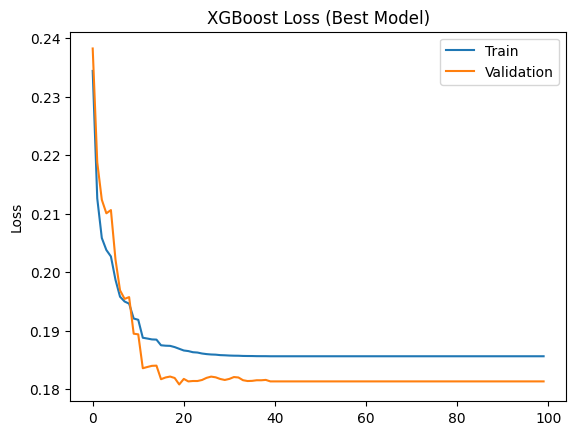

In [53]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define parameter grid (keep small for speed)
param_grid = {
    'learning_rate': [0.05, 0.1, 0.3 , 0.5],
    'max_depth': [2, 3, 4],
    'n_estimators': [50, 100]
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

# Evaluate on validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print(f"Best Validation MSE: {mse_val:.4f}")
print(f"Best Validation R²: {r2_val:.4f}")

# Evaluate on test set
y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test Set MSE: {mse_test:.4f}")
print(f"Test Set R²: {r2_test:.4f}")

# Optionally, plot learning curve for best model
eval_set = [(X_train, y_train), (X_val, y_val)]
best_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
results = best_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('Loss')
plt.title('XGBoost Loss (Best Model)')
plt.show()

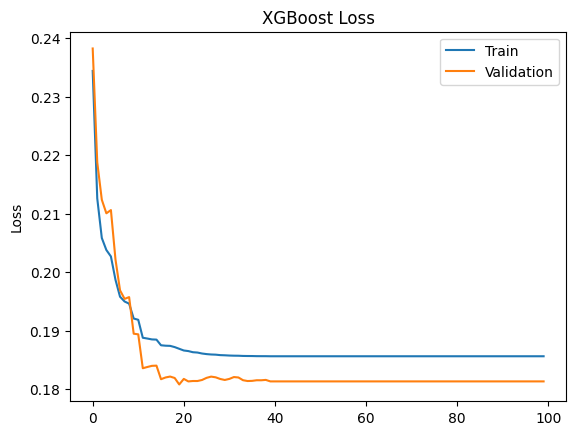

In [54]:
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('Loss')
plt.title('XGBoost Loss')
plt.show()

In [55]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [56]:
# evaluating the model: 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R 2 Score: {r2_score(y_test, y_pred):.4f}")

Mean Absolute Error (MAE): 0.1306
Mean Squared Error (MSE): 0.0269
Root Mean Squared Error (RMSE): 0.1641
R 2 Score: 0.7146


# Decision Trees approach: 



📊 Train Evaluation
MSE:  0.0343
MAE:  0.1311
RMSE: 0.1851
R²:   0.6272

📊 Validation Evaluation
MSE:  0.0328
MAE:  0.1350
RMSE: 0.1810
R²:   0.6361

📊 Test Evaluation
MSE:  0.0269
MAE:  0.1307
RMSE: 0.1642
R²:   0.7145


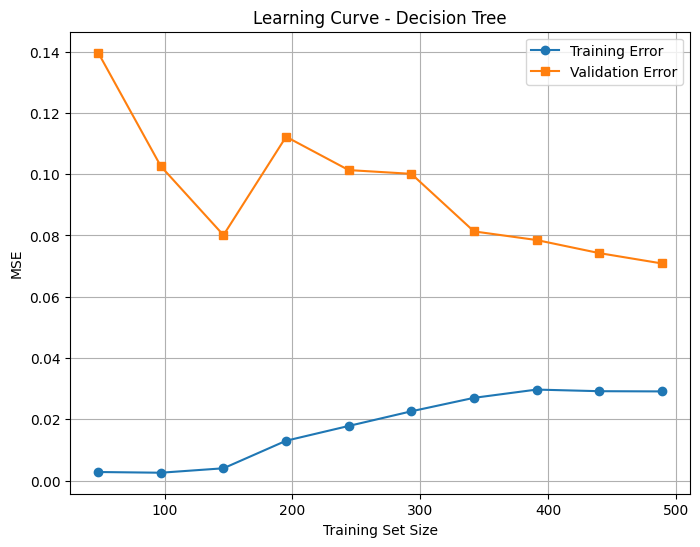

In [24]:
# ============================================
# Decision Tree Regression with Validation
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, learning_curve

# 1. Load Dataset
# Replace 'your_dataset.csv' with your actual file path


# Separate features and target


# 2. Split Data (train, validation, test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test     = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Train Decision Tree
model = DecisionTreeRegressor(random_state=42, max_depth=None)  # try different max_depth for tuning
model.fit(X_train, y_train)

# 4. Predictions
y_train_pred = model.predict(X_train)
y_val_pred   = model.predict(X_val)
y_test_pred  = model.predict(X_test)

# 5. Evaluation Function
def evaluate_model(y_true, y_pred, dataset_name):
    mse  = mean_squared_error(y_true, y_pred)
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    print(f"\n📊 {dataset_name} Evaluation")
    print(f"MSE:  {mse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

# 6. Evaluate on train, validation, and test sets
evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_val, y_val_pred, "Validation")
evaluate_model(y_test, y_test_pred, "Test")

# 7. Plot Learning Curve to Detect Overfitting
train_sizes, train_scores, val_scores = learning_curve(
    DecisionTreeRegressor(random_state=42),
    X, y,
    cv=5,
    scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Mean and std
train_mean = -train_scores.mean(axis=1)
val_mean   = -val_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Training Error", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Error", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.title("Learning Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
X_train.head()

,ap,vc,f
167,0.25,350,0.10
54,0.50,310,0.07
577,0.50,350,0.13
46,0.25,310,0.07
93,0.50,350,0.10


In [26]:
X_train.shape

(428, 3)

In [27]:
y_val.head()

299    0.894
567    0.587
199    0.858
209    1.171
383    1.124
Name: Ra, dtype: float64


📊 Decision Tree - Train Evaluation
MSE:  0.0343
MAE:  0.1311
RMSE: 0.1851
R²:   0.6272

📊 Decision Tree - Validation Evaluation
MSE:  0.0328
MAE:  0.1350
RMSE: 0.1810
R²:   0.6361

📊 Decision Tree - Test Evaluation
MSE:  0.0269
MAE:  0.1307
RMSE: 0.1642
R²:   0.7145

📊 Random Forest - Train Evaluation
MSE:  0.0343
MAE:  0.1307
RMSE: 0.1852
R²:   0.6271

📊 Random Forest - Validation Evaluation
MSE:  0.0325
MAE:  0.1341
RMSE: 0.1803
R²:   0.6389

📊 Random Forest - Test Evaluation
MSE:  0.0276
MAE:  0.1318
RMSE: 0.1662
R²:   0.7074
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14
[LightGBM] [Info] Number of data points in the train set: 428, number of used features: 3
[LightGBM] [Info] Start training from score 0.683624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

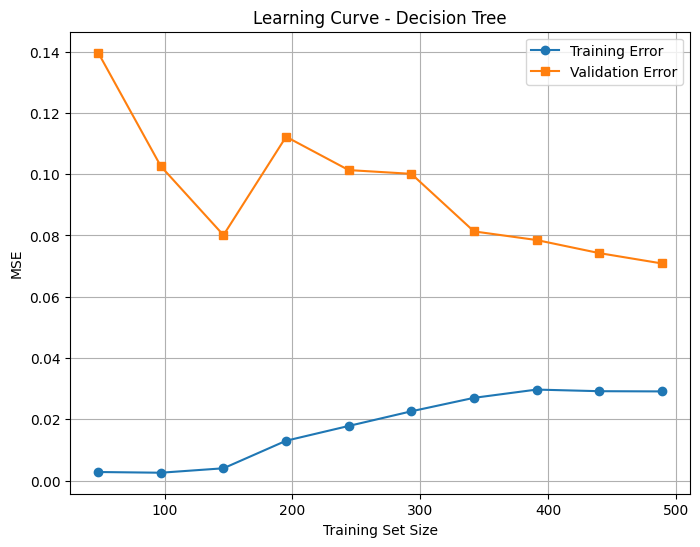

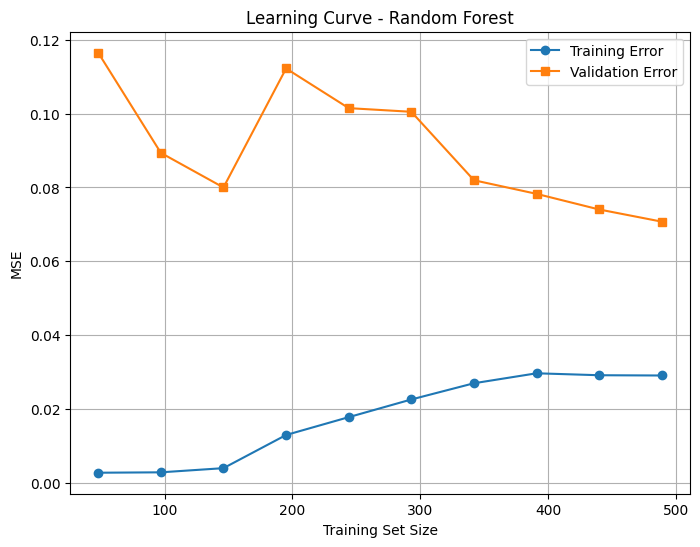

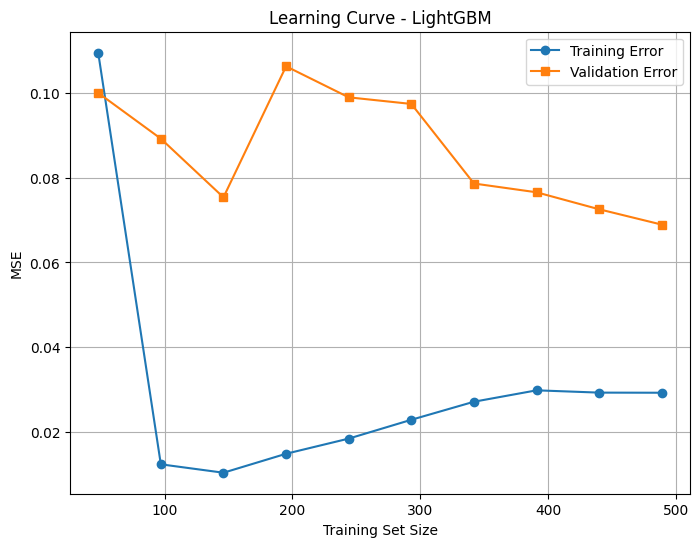

In [35]:
# 3. Define Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=50),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200),
    "LightGBM": LGBMRegressor(random_state=42, n_estimators=500)
}

# 4. Evaluation Function
def evaluate_model(y_true, y_pred, dataset_name, model_name):   
    mse  = mean_squared_error(y_true, y_pred)
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} - {dataset_name} Evaluation")
    print(f"MSE:  {mse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

# 5. Train, Predict, Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred   = model.predict(X_val)
    y_test_pred  = model.predict(X_test)

    evaluate_model(y_train, y_train_pred, "Train", name)
    evaluate_model(y_val, y_val_pred, "Validation", name)
    evaluate_model(y_test, y_test_pred, "Test", name)

# 6. Plot Learning Curves
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        cv=5,
        scoring="neg_mean_squared_error",
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_mean = -train_scores.mean(axis=1)
    val_mean   = -val_scores.mean(axis=1)

    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, label="Training Error", marker="o")
    plt.plot(train_sizes, val_mean, label="Validation Error", marker="s")
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# 7. Plot curves for each model
for name, model in models.items():
    plot_learning_curve(model, X, y, f"Learning Curve - {name}")


📊 Train Evaluation
MSE:  0.0448
MAE:  0.1604
RMSE: 0.2117
R²:   0.5126

📊 Validation Evaluation
MSE:  0.0463
MAE:  0.1702
RMSE: 0.2151
R²:   0.4865

📊 Test Evaluation
MSE:  0.0473
MAE:  0.1645
RMSE: 0.2176
R²:   0.4985


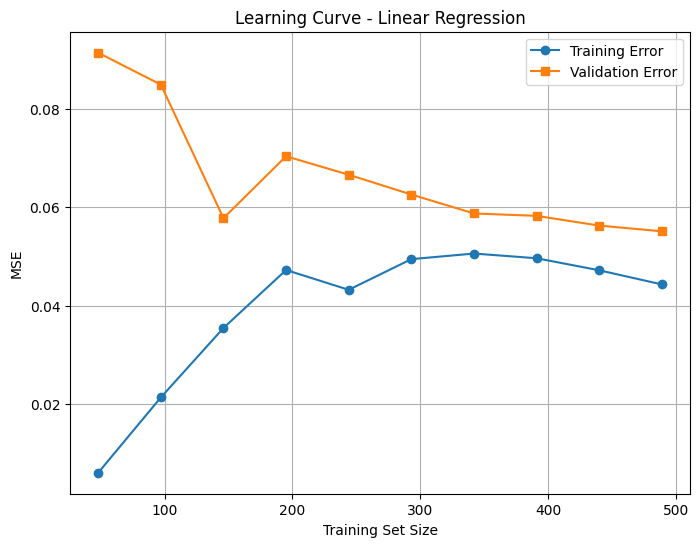

In [ ]:
from sklearn.linear_model import LinearRegression
# ============================================
# Linear Regression Model with Evaluation
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load Dataset

# 2. Split Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test     = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predictions
y_train_pred = model.predict(X_train)
y_val_pred   = model.predict(X_val)
y_test_pred  = model.predict(X_test)

# 5. Evaluation Function
def evaluate_model(y_true, y_pred, dataset_name):
    mse  = mean_squared_error(y_true, y_pred)
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    print(f"\n📊 {dataset_name} Evaluation")
    print(f"MSE:  {mse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

# 6. Evaluate
evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_val, y_val_pred, "Validation")
evaluate_model(y_test, y_test_pred, "Test")

# 7. Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), X, y,
    cv=5,
    scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = -train_scores.mean(axis=1)
val_mean   = -val_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Training Error", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Error", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.title("Learning Curve - Linear Regression")
plt.legend()
plt.grid(True)
plt.show()
